In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
data.shape

(167, 10)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [28]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [18]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot:>

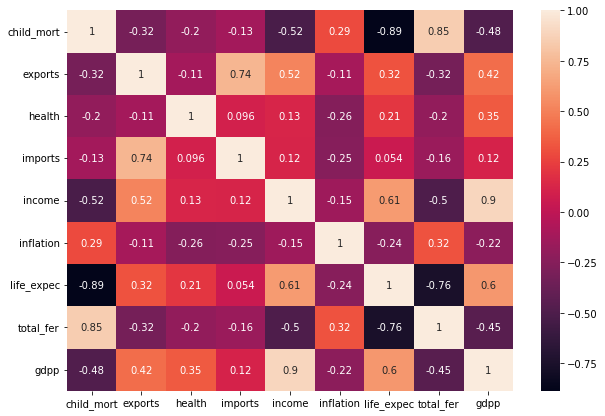

In [19]:
corr_matrix = data.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot = True)       




Some variables are highly correlated.We can solve this issue by PCA

# Outlier Analysis
Plotting boxplots to see how values in each columns are distributed

In [30]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

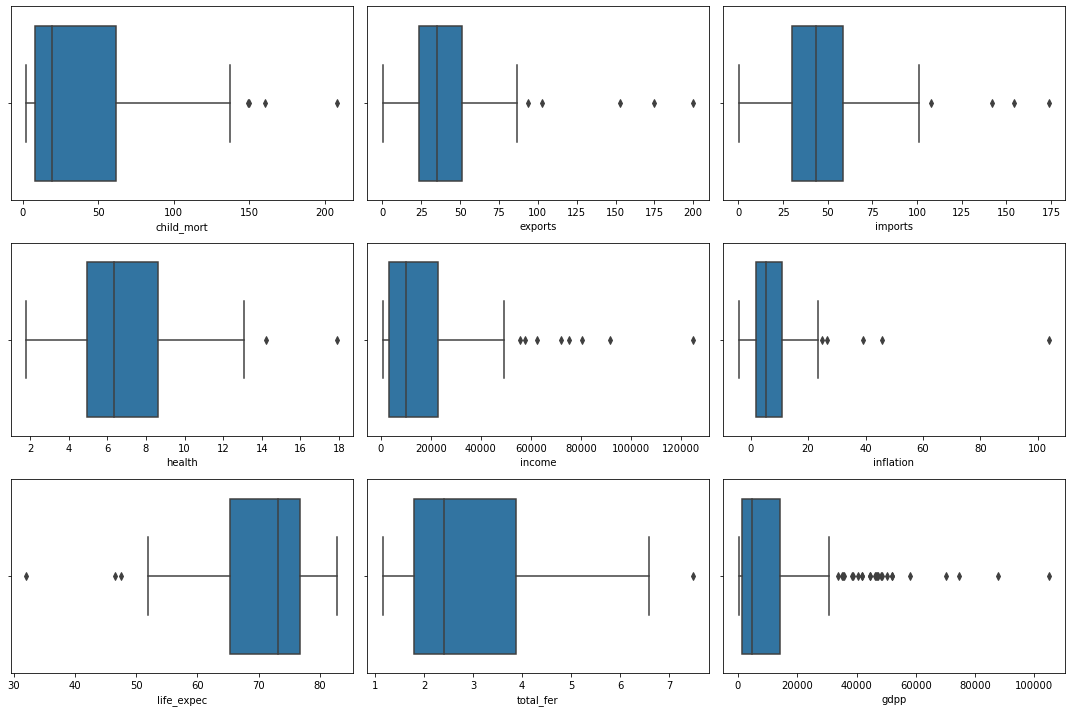

In [20]:
fig, ax = plt.subplots(3, 3, figsize = (15,10))

plt1 = sns.boxplot(data['child_mort'], ax = ax[0,0])
plt2 = sns.boxplot(data['exports'], ax = ax[0,1])
plt3 = sns.boxplot(data['imports'], ax = ax[0,2])
plt4 = sns.boxplot(data['health'], ax = ax[1,0])
plt5 = sns.boxplot(data['income'], ax = ax[1,1])
plt6 = sns.boxplot(data['inflation'], ax = ax[1,2])
plt7 = sns.boxplot(data['life_expec'], ax = ax[2,0])
plt8 = sns.boxplot(data['total_fer'], ax = ax[2,1])
plt9 = sns.boxplot(data['gdpp'], ax = ax[2,2])

plt.tight_layout()


In [21]:
data1 = data.copy()

There are a number of outliers in the data

Keeping in mind we need to identify backward countries based on socio economic and health factors, we will cap the outliers to values accordingly for analysis

In [22]:
def outlier_replace(data, var):
    percentiles = data[var].quantile([0.05, 0.95]).values
    data[var][data[var] <= percentiles[0]] = percentiles[0]
    data[var][data[var] >= percentiles[1]] = percentiles[1]

In [23]:
for x in data1.drop(['country'], axis = 1).columns:
    outlier_replace(data1, x)

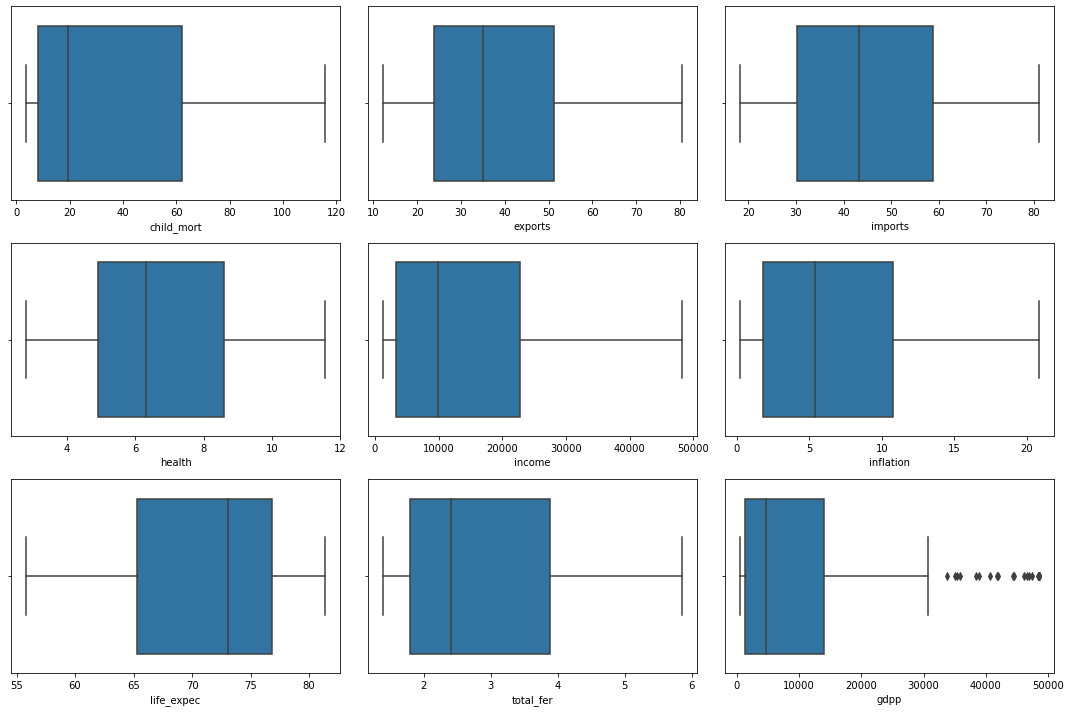

In [24]:
fig, ax = plt.subplots(3, 3, figsize = (15,10))

plt1 = sns.boxplot(data1['child_mort'], ax = ax[0,0])
plt2 = sns.boxplot(data1['exports'], ax = ax[0,1])
plt3 = sns.boxplot(data1['imports'], ax = ax[0,2])
plt4 = sns.boxplot(data1['health'], ax = ax[1,0])
plt5 = sns.boxplot(data1['income'], ax = ax[1,1])
plt6 = sns.boxplot(data1['inflation'], ax = ax[1,2])
plt7 = sns.boxplot(data1['life_expec'], ax = ax[2,0])
plt8 = sns.boxplot(data1['total_fer'], ax = ax[2,1])
plt9 = sns.boxplot(data1['gdpp'], ax = ax[2,2])

plt.tight_layout()


# Normalizing the Data


In [25]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
var = data1.drop(['country'], axis = 1).columns
data1[var] = norm.fit_transform(data1[var])

In [31]:
data1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.013500,0.005433,0.001247,0.008541,0.857650,0.001541,0.012040,0.000805,0.481885
std,0.023074,0.005813,0.001745,0.010876,0.097213,0.002498,0.013042,0.001211,0.147187
min,0.000050,0.000181,0.000041,0.000265,0.456923,0.000003,0.001151,0.000021,0.236038
25%,0.000285,0.001424,0.000229,0.001232,0.811939,0.000088,0.002767,0.000063,0.360926
50%,0.002000,0.002995,0.000519,0.003731,0.896065,0.000515,0.006146,0.000195,0.441402
75%,0.016765,0.007129,0.001419,0.011165,0.928843,0.001888,0.016035,0.000956,0.583190
max,0.088814,0.031431,0.008867,0.062099,0.971387,0.015907,0.046532,0.004492,0.889148


# PCA on the data

In [32]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver = 'randomized', random_state = 42)

Putting feature variable to x and response variable to y

In [33]:
x = data1.drop(['country'], axis = 1)
y = data1['country']

In [34]:
pca.fit(x)

PCA(random_state=42, svd_solver='randomized')

In [35]:
pca.components_

array([[-5.13674292e-02, -1.51076059e-02, -3.47809193e-03,
        -2.43667162e-02, -5.46532083e-01, -5.62510357e-03,
        -3.66844394e-02, -2.75782823e-03,  8.34532803e-01],
       [ 7.93393447e-01,  1.50010028e-01,  5.41352722e-02,
         3.30294396e-01, -2.29013940e-01,  6.06683525e-02,
         4.16316612e-01,  4.11234491e-02, -6.97145700e-02],
       [-2.06736211e-01, -4.65004460e-02, -1.28628718e-02,
        -1.04551660e-01, -8.03554537e-01,  1.27747039e-02,
        -3.88953959e-02, -8.36402530e-03, -5.44569049e-01],
       [-5.21404578e-01,  3.10655771e-01,  4.63817073e-02,
         7.37128740e-01, -1.21397179e-04, -4.17512016e-03,
         2.93276807e-01, -5.22234318e-03,  8.01315282e-03],
       [-1.81799395e-01, -6.56275064e-01,  7.23441590e-02,
        -1.40184305e-01,  4.42946795e-02, -2.63535886e-03,
         7.12405142e-01,  2.74238450e-02,  3.35348456e-02],
       [ 1.37769988e-01, -6.42061159e-01,  6.72173481e-02,
         5.42438762e-01, -3.16314667e-02, -2.487070

# To find the optimum no.of components

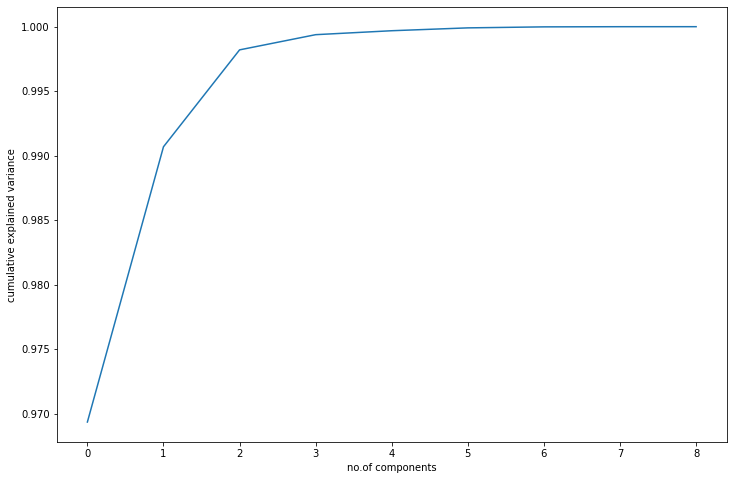

In [36]:
# plotting the cumulative variance against the no.of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no.of components')
plt.ylabel('cumulative explained variance')
plt.show()

From figure 4 components are enough to explain the 95% variance in the dataset

In [37]:
# Using the incremental PCA for efficiency(saves a lot of time on larger datasets)

from sklearn.decomposition import PCA
pca_final = PCA(n_components = 4)

In [38]:
df_pca = pca_final.fit_transform(x)
df_pca.shape

(167, 4)

In [39]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-0.181920,0.037901,0.006010,-0.001932
1,-0.119981,-0.021706,0.004447,0.000108
2,-0.176225,-0.023563,0.017638,-0.002598
3,0.026011,-0.001124,-0.017793,-0.003088
4,0.056422,-0.017119,-0.014927,-0.000761


<AxesSubplot:>

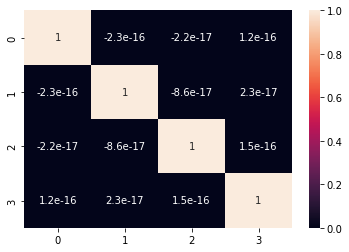

In [40]:
corr_ = df_pca.corr()
sns.heatmap(corr_, annot = True)

# K-Means Clustering

[5.3053632449361015, 1.4144573042168314, 0.6749545992130398, 0.46215380508408127, 0.3643511347668793, 0.29184823497663465, 0.21460439163602738, 0.17218937457208433, 0.14684476127357762, 0.12301478494393996]


Text(0, 0.5, 'WCSS')

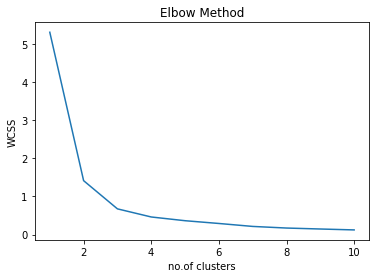

In [41]:
from sklearn.cluster import KMeans

clusters = range(1,11)
wcss = []

for k in clusters:
    kmeans = KMeans(n_clusters = k, random_state = 42, init = 'k-means++')
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')

In [42]:
km_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
km_labels = km_model.fit_predict(df_pca)
km_labels

array([0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2,
       1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0])

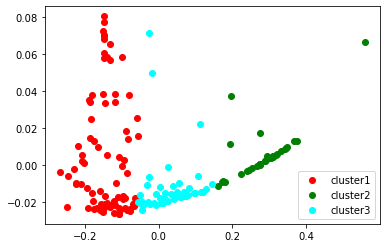

In [43]:
d = df_pca.values
plt.scatter(d[km_labels == 0,0], d[km_labels == 0,1], color = 'red', label = 'cluster1')
plt.scatter(d[km_labels == 1,0], d[km_labels == 1,1], color = 'green', label = 'cluster2')
plt.scatter(d[km_labels == 2,0], d[km_labels == 2,1], color = 'cyan', label = 'cluster3')
plt.legend()
plt.show()

# Checking the Efficiency


In [44]:
from sklearn.metrics import silhouette_score as ss, davies_bouldin_score as db

In [45]:
print('Silhouette score = ', ss(df_pca, km_labels))
print('DB index = ', db(df_pca, km_labels))

Silhouette score =  0.5588934113588143
DB index =  0.5467387340070148


# Identifying the cluster of backward countries

In [46]:
df_pca_km = pd.concat([df_pca, pd.Series(km_labels)], axis =1)
df_pca_km.columns = ['PC1','PC2', 'PC3','PC4', 'cluster_id']
df_pca_km.head()

,PC1,PC2,PC3,PC4,cluster_id
0,-0.181920,0.037901,0.006010,-0.001932,0
1,-0.119981,-0.021706,0.004447,0.000108,0
2,-0.176225,-0.023563,0.017638,-0.002598,0
3,0.026011,-0.001124,-0.017793,-0.003088,2
4,0.056422,-0.017119,-0.014927,-0.000761,2


In [47]:
pca_cluster_km = pd.concat([data1['country'], df_pca_km], axis = 1, join = 'outer',
                           ignore_index = False, keys = None, levels = None, names = None,
                          verify_integrity = False, sort = None, copy = True)
pca_cluster_km.head()

,country,PC1,PC2,PC3,PC4,cluster_id
0,Afghanistan,-0.181920,0.037901,0.006010,-0.001932,0
1,Albania,-0.119981,-0.021706,0.004447,0.000108,0
2,Algeria,-0.176225,-0.023563,0.017638,-0.002598,0
3,Angola,0.026011,-0.001124,-0.017793,-0.003088,2
4,Antigua and Barbuda,0.056422,-0.017119,-0.014927,-0.000761,2


In [48]:
clustered_data_km = pca_cluster_km[['country', 'cluster_id']].merge(data, on = 'country')
clustered_data_km.head()

,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [49]:
km_cluster_child_mort = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).child_mort.mean())
km_cluster_exports = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).exports.mean())
km_cluster_imports = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).imports.mean())
km_cluster_health = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).health.mean())
km_cluster_income = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).income.mean())
km_cluster_inflation = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).inflation.mean())
km_cluster_life_expec = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).life_expec.mean())
km_cluster_total_fer = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).total_fer.mean())
km_cluster_gdpp = pd.DataFrame(clustered_data_km.groupby(['cluster_id']).gdpp.mean())

df_km = pd.concat([pd.Series([0,1,2]), km_cluster_child_mort, km_cluster_exports, km_cluster_imports, 
               km_cluster_health, km_cluster_income, km_cluster_inflation, km_cluster_life_expec, km_cluster_total_fer, 
               km_cluster_gdpp], axis = 1)
df_km.columns = ['cluster_id', 'child_mort_mean', 'exports_mean', 'imports_mean', 'health_mean', 
              'income_mean', 'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean'] 
df_km

,cluster_id,child_mort_mean,exports_mean,imports_mean,health_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,57.325301,33.173482,43.169469,6.061205,7504.253012,10.499771,66.109639,3.543012,3046.469880
1,1,10.294444,48.441667,47.825000,9.277778,39368.611111,3.715222,78.547222,2.078889,39656.111111
2,2,26.302083,49.331250,52.622917,6.273750,17146.666667,6.132021,72.250000,2.570833,10094.520833


<AxesSubplot:xlabel='cluster_id', ylabel='gdpp_mean'>

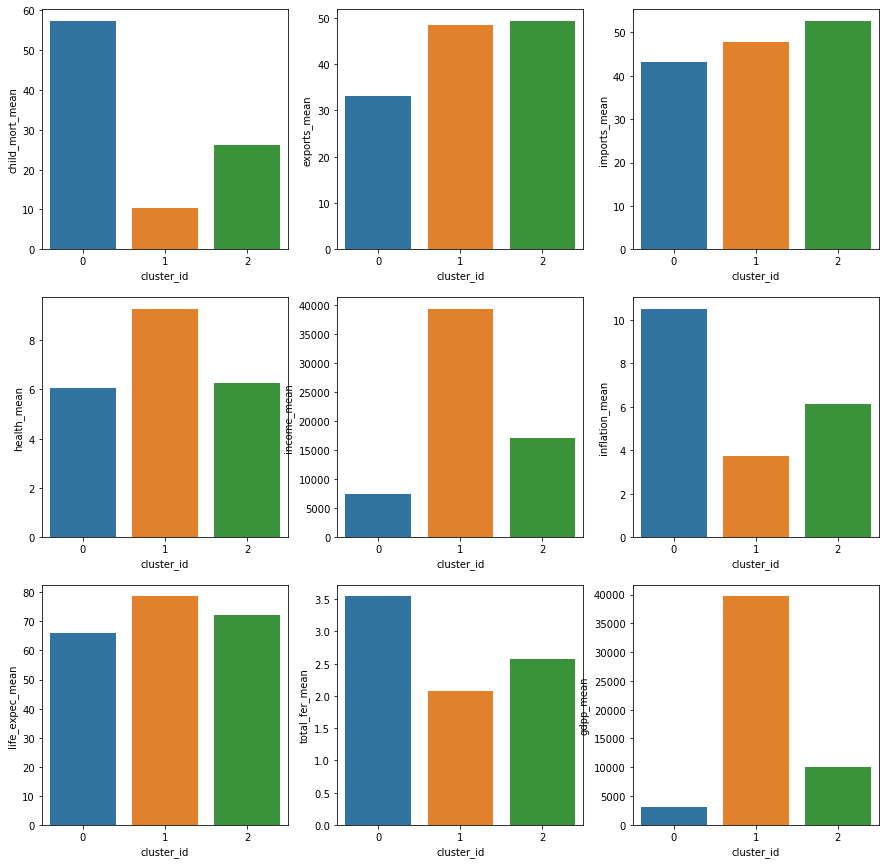

In [50]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

sns.barplot(x = 'cluster_id', y = 'child_mort_mean', data = df_km, ax = ax[0,0])
sns.barplot(x = 'cluster_id', y = 'exports_mean', data = df_km, ax = ax[0,1])
sns.barplot(x = 'cluster_id', y = 'imports_mean', data = df_km, ax = ax[0,2])
sns.barplot(x = 'cluster_id', y = 'health_mean', data = df_km, ax = ax[1,0])
sns.barplot(x = 'cluster_id', y = 'income_mean', data = df_km, ax = ax[1,1])
sns.barplot(x = 'cluster_id', y = 'inflation_mean', data = df_km, ax = ax[1,2])
sns.barplot(x = 'cluster_id', y = 'life_expec_mean', data = df_km, ax = ax[2,0])
sns.barplot(x = 'cluster_id', y = 'total_fer_mean', data = df_km, ax = ax[2,1])
sns.barplot(x = 'cluster_id', y = 'gdpp_mean', data = df_km, ax = ax[2,2])

In [51]:
cluster_0_km = clustered_data_km[clustered_data_km['cluster_id'] == 0]['country'].values
cluster_0_km

array(['Afghanistan', 'Albania', 'Algeria', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'China', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Egypt',
       'El Salvador', 'Eritrea', 'Gambia', 'Georgia', 'Ghana',
       'Guatemala', 'Guinea-Bissau', 'Haiti', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic',
       'Lao', 'Lesotho', 'Liberia', 'Libya', 'Macedonia, FYR',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
       'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Oman', 'Pakistan',
       'Paraguay', 'Philippines', 'Romania', 'Russia', 'Rwanda',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone', 'Sri Lanka',
       'Sudan', 'Tajikistan', 'Tanzania', 'Thail

In [52]:
len(cluster_0_km)

83

# Hierarchical Clustering

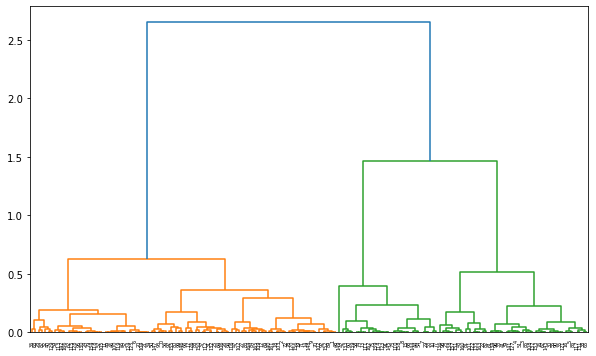

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

linked = linkage(df_pca, method = 'ward', metric = 'euclidean')
plt.figure(figsize = (10,6))
dendrogram(linked)
plt.show()

From the plot, the optimum no.of clusters = 2

In [54]:
from sklearn.cluster import AgglomerativeClustering as agg

In [55]:
agg_model = agg(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
agg_labels = agg_model.fit_predict(df_pca)
agg_labels

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

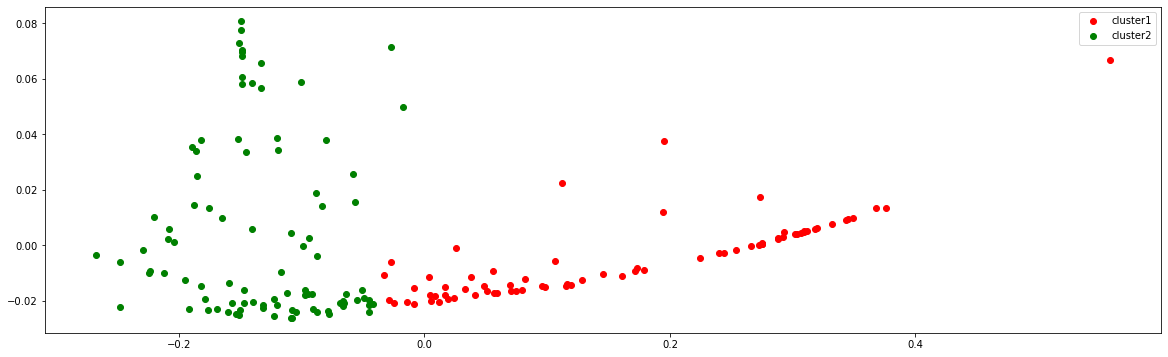

In [56]:
plt.figure(figsize = (20,6))

plt.scatter(d[agg_labels == 0,0], d[agg_labels == 0,1], c = 'red', label = 'cluster1')
plt.scatter(d[agg_labels == 1,0], d[agg_labels == 1,1], c = 'green', label = 'cluster2')

plt.legend()
plt.show()


# Checking the efficiency

In [57]:
print('Silhouette score = ', ss(df_pca, agg_labels))
print('DB index = ', db(df_pca, agg_labels))

Silhouette score =  0.5565343123432354
DB index =  0.6216472876787545


# Identifying the cluster of backward countries

In [58]:
df_pca_hc = pd.concat([df_pca, pd.Series(agg_labels)], axis = 1)
df_pca_hc.columns = ['PC1','PC2','PC3','PC4','cluster_id']
df_pca_hc.head()

,PC1,PC2,PC3,PC4,cluster_id
0,-0.181920,0.037901,0.006010,-0.001932,1
1,-0.119981,-0.021706,0.004447,0.000108,1
2,-0.176225,-0.023563,0.017638,-0.002598,1
3,0.026011,-0.001124,-0.017793,-0.003088,0
4,0.056422,-0.017119,-0.014927,-0.000761,0


In [59]:
pca_cluster_hc = pd.concat([data1['country'], df_pca_hc], axis = 1, join = 'outer',
                           ignore_index = False, keys = None, levels = None, names = None,
                          verify_integrity = False, sort = None, copy = True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,cluster_id
0,Afghanistan,-0.181920,0.037901,0.006010,-0.001932,1
1,Albania,-0.119981,-0.021706,0.004447,0.000108,1
2,Algeria,-0.176225,-0.023563,0.017638,-0.002598,1
3,Angola,0.026011,-0.001124,-0.017793,-0.003088,0
4,Antigua and Barbuda,0.056422,-0.017119,-0.014927,-0.000761,0


In [60]:
clustered_data_hc = pca_cluster_hc[['country', 'cluster_id']].merge(data, on = 'country')
clustered_data_hc.head()

,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
hc_cluster_child_mort = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).child_mort.mean())
hc_cluster_exports = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).exports.mean())
hc_cluster_imports = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).imports.mean())
hc_cluster_health = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).health.mean())
hc_cluster_income = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).income.mean())
hc_cluster_inflation = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).inflation.mean())
hc_cluster_life_expec = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).life_expec.mean())
hc_cluster_total_fer = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).total_fer.mean())
hc_cluster_gdpp = pd.DataFrame(clustered_data_hc.groupby(['cluster_id']).gdpp.mean())

df_hc = pd.concat([pd.Series([0,1]), hc_cluster_child_mort, hc_cluster_exports, hc_cluster_imports, 
               hc_cluster_health, hc_cluster_income, hc_cluster_inflation, hc_cluster_life_expec, hc_cluster_total_fer, 
               hc_cluster_gdpp], axis = 1)
df_hc.columns = ['cluster_id', 'child_mort_mean', 'exports_mean', 'imports_mean', 'health_mean', 
              'income_mean', 'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean'] 
df_hc

,cluster_id,child_mort_mean,exports_mean,imports_mean,health_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,15.965333,49.630667,51.030667,7.813733,28123.333333,4.690600,75.560000,2.249867,24615.466667
1,1,56.453261,34.161946,43.514847,6.002065,8194.706522,10.301859,66.476087,3.517065,3465.804348


<AxesSubplot:xlabel='cluster_id', ylabel='gdpp_mean'>

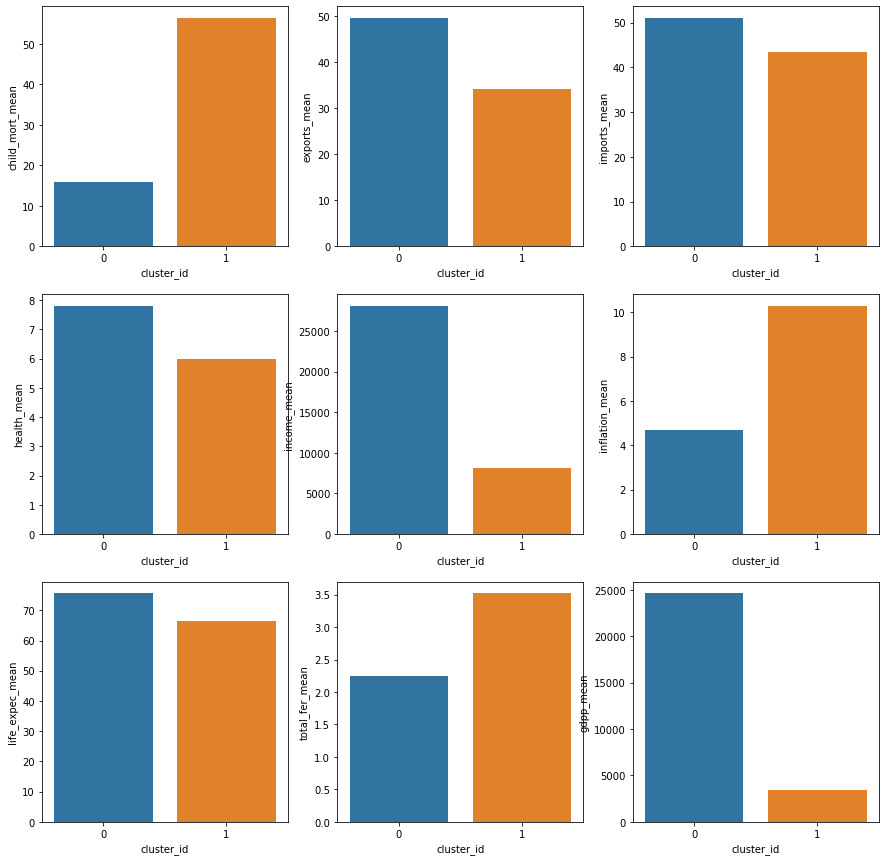

In [62]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

sns.barplot(x = 'cluster_id', y = 'child_mort_mean', data = df_hc, ax = ax[0,0])
sns.barplot(x = 'cluster_id', y = 'exports_mean', data = df_hc, ax = ax[0,1])
sns.barplot(x = 'cluster_id', y = 'imports_mean', data = df_hc, ax = ax[0,2])
sns.barplot(x = 'cluster_id', y = 'health_mean', data = df_hc, ax = ax[1,0])
sns.barplot(x = 'cluster_id', y = 'income_mean', data = df_hc, ax = ax[1,1])
sns.barplot(x = 'cluster_id', y = 'inflation_mean', data = df_hc, ax = ax[1,2])
sns.barplot(x = 'cluster_id', y = 'life_expec_mean', data = df_hc, ax = ax[2,0])
sns.barplot(x = 'cluster_id', y = 'total_fer_mean', data = df_hc, ax = ax[2,1])
sns.barplot(x = 'cluster_id', y = 'gdpp_mean', data = df_hc, ax = ax[2,2])

In [63]:
cluster_0 = clustered_data_hc[clustered_data_hc['cluster_id'] == 1]['country'].values
cluster_0

array(['Afghanistan', 'Albania', 'Algeria', 'Armenia', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Belarus', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'China', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire",
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gambia', 'Georgia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Libya',
       'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Mali',
       'Mauritania', 'Mauritius', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria',
       'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Romania',
       'Russia', 'R